# 3. Hafta Lab-1: $L2$ Regularization vs $\lambda$
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
## İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
### Dr. Ferhat Özgür Çatak
Bu lab çalışmasında lojistik regresyon algoritmasında $L2$ regularization yönteminde $\lambda$ değeriyle ağırlık vektörünün $\mathbf{w}$ değişimi KDDCUP'99 veri kümesinde uygulayacağız.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

KDDCUP'99 veri kumesini oku

In [2]:
# veri kumesini oku
kolon_adlari = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate','label']

verikumesi = pd.read_csv("kddcup99.tar.gz",compression="gzip", names=kolon_adlari, 
low_memory=False, skiprows=1)

secilecek_kolonlar = ['serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate']

X = verikumesi[secilecek_kolonlar].as_matrix()
y = verikumesi['label'].apply(lambda d:0 if d == 'normal.' else 1).as_matrix()

$\lambda$ değerlerini ve agirlik sonuclarinin tutulacagi matrisi tanımla

In [3]:
# lambda degerleri
lambdas=[x for x in range(1, 1000, 25)]

# agirliklar icin zero matris tanimla
coefs_ridge = np.zeros((len(lambdas),X.shape[1]))

Her bir $\lambda$ değeri için ağırlıkları hesapla

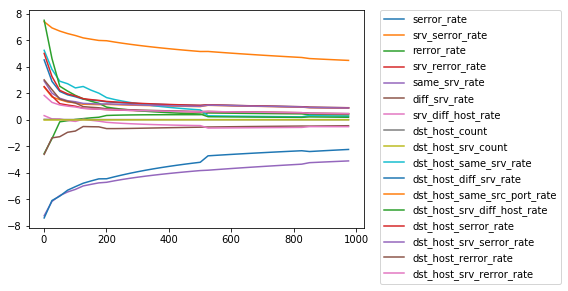

In [4]:
i = 0
for l in lambdas:
   clf = LogisticRegression(verbose=0, C=1/l)
   clf.fit(X,y)
   coefs_ridge[i,:] = clf.coef_
   i += 1

for i in range(X.shape[1]):
    coef_l = coefs_ridge[:,i]
    l1 = plt.plot(lambdas, coef_l, label= secilecek_kolonlar[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()